<a href="https://colab.research.google.com/github/Jagadeesh-Reddy-Bhimireddy/GIDS_for_Vehicle_CAN/blob/main/595_Final_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# installing the dependencies and Defining global definitions.


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [30]:
## 1. Analyze the Data and see what you can make of it ?

#Importing the required libraries.
import pandas as pd
import numpy as np
import tensorflow as tf
tf.random.set_seed(0)


# Set the load data row number.
# Set colunms names.
# Remove useless colunms.

dos_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DoS_dataset.csv", header=None)

col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
dos_data = dos_data.dropna()

dos_data.columns = col_names

dos_data.head()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,Data
0,1.478198e+09,0316,8,05,21,68,09,21,21,00,6f,R
1,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R


In [33]:
dos_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DoS_dataset.csv", header=None)

col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
dos_data = dos_data.dropna()
dos_data.columns = col_names
dos_data = dos_data.drop(['dlc','d0','d1','d2','d3','d4','d5','d6','d7'], axis=1)
dos_data.head()
plotPerColumnDistribution(dos_data, 3, 3)

,time_stamp,id,Data
0,1.478198e+09,0316,R
1,1.478198e+09,018f,R
2,1.478198e+09,0260,R
3,1.478198e+09,02a0,R
4,1.478198e+09,0329,R


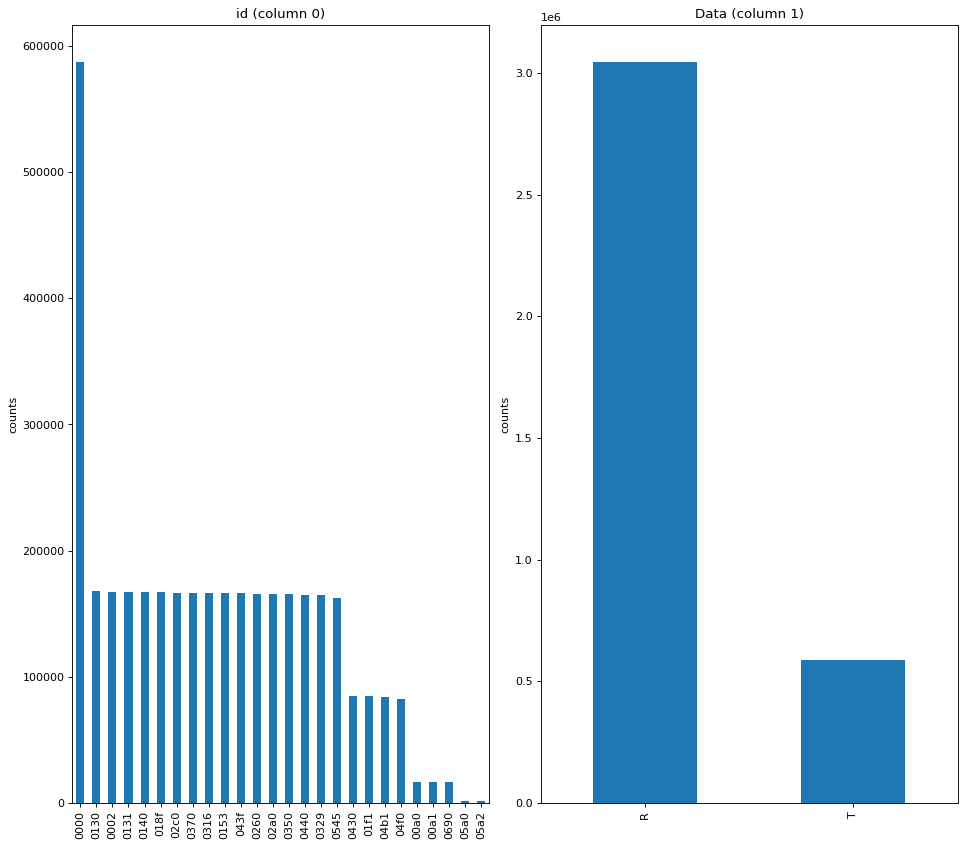

In [34]:
plotPerColumnDistribution(dos_data, 3, 3)

In [14]:
fuzzy_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fuzzy_dataset.csv",nrows=35000,sep=',',header=None)
col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
fuzzy_data = fuzzy_data.dropna()

fuzzy_data.columns = col_names

fuzzy_data.head()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,Data
0,1.478196e+09,0545,8,d8,00,00,8a,00,00,00,00,R
2,1.478196e+09,0002,8,00,00,00,00,00,01,07,15,R
3,1.478196e+09,0153,8,00,21,10,ff,00,ff,00,00,R
4,1.478196e+09,0130,8,19,80,00,ff,fe,7f,07,60,R
5,1.478196e+09,0131,8,17,80,00,00,65,7f,07,9f,R


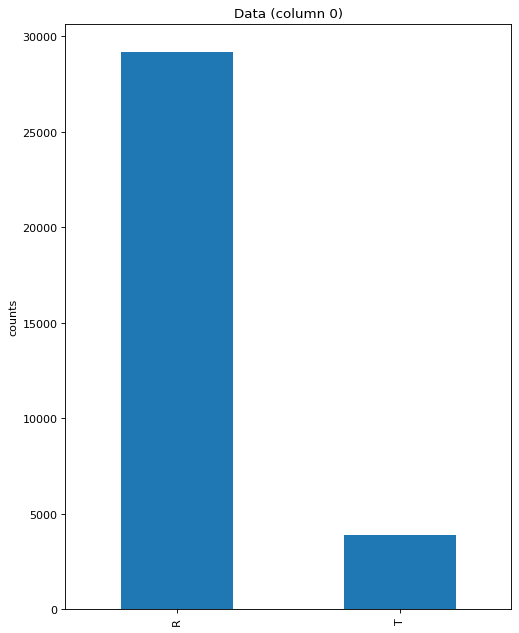

In [51]:
fuzzy_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fuzzy_dataset.csv",nrows=35000,sep=',',header=None)
col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
fuzzy_data.columns = col_names
fuzzy_data = fuzzy_data.dropna()
fuzzy_data = fuzzy_data.drop(['dlc','d0','d1','d2','d3','d4','d5','d6','d7'], axis=1)
fuzzy_data.head()
plotPerColumnDistribution(fuzzy_data, 3, 3)

In [18]:
rpm_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RPM_dataset.csv",nrows=35000,sep=',',header=None)
col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
rpm_data = rpm_data.dropna()

rpm_data.columns = col_names

rpm_data.head()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,Data
0,1478191030,316,8,5,22,68,9,22,20,0,75,R
1,1478191030,018f,8,fe,3b,0,0,0,3c,0,0,R
2,1478191030,260,8,19,22,22,30,ff,8f,6e,3f,R
3,1478191030,02a0,8,60,0,83,1d,96,2,bd,0,R
4,1478191030,329,8,dc,b8,7e,14,11,20,0,14,R


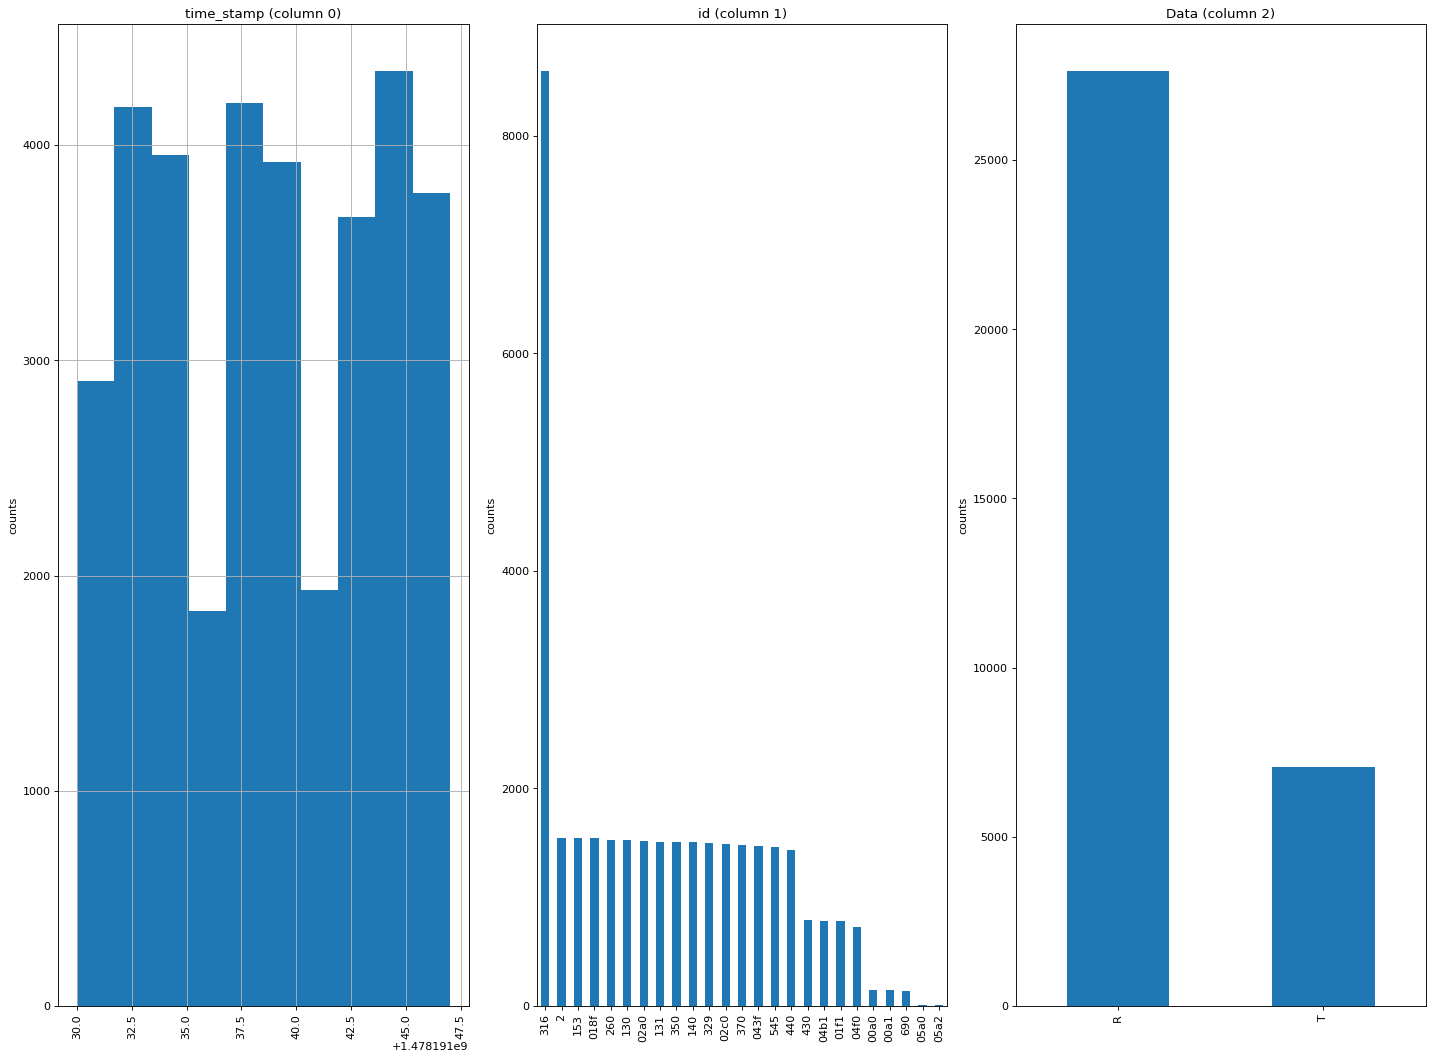

In [48]:
rpm_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RPM_dataset.csv",nrows=35000,sep=',',header=None)
rpm_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
rpm_data.columns = col_names
rpm_data = rpm_data.dropna()
rpm_data = rpm_data.drop(['dlc','d0','d1','d2','d3','d4','d5','d6','d7'], axis=1)
rpm_data.head()
plotPerColumnDistribution(rpm_data, 3, 3)

In [19]:
gear_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gear_dataset.csv",nrows=35000,sep=',',header=None)
col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
gear_data = gear_data.dropna()

gear_data.columns = col_names

gear_data.head()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,Data
0,1.478193e+09,0140,8,00,00,00,00,10,29,2a,24,R
1,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R
2,1.478193e+09,0350,8,05,20,44,68,77,00,00,7e,R
3,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R
4,1.478193e+09,043f,8,10,40,60,ff,78,c4,08,00,R


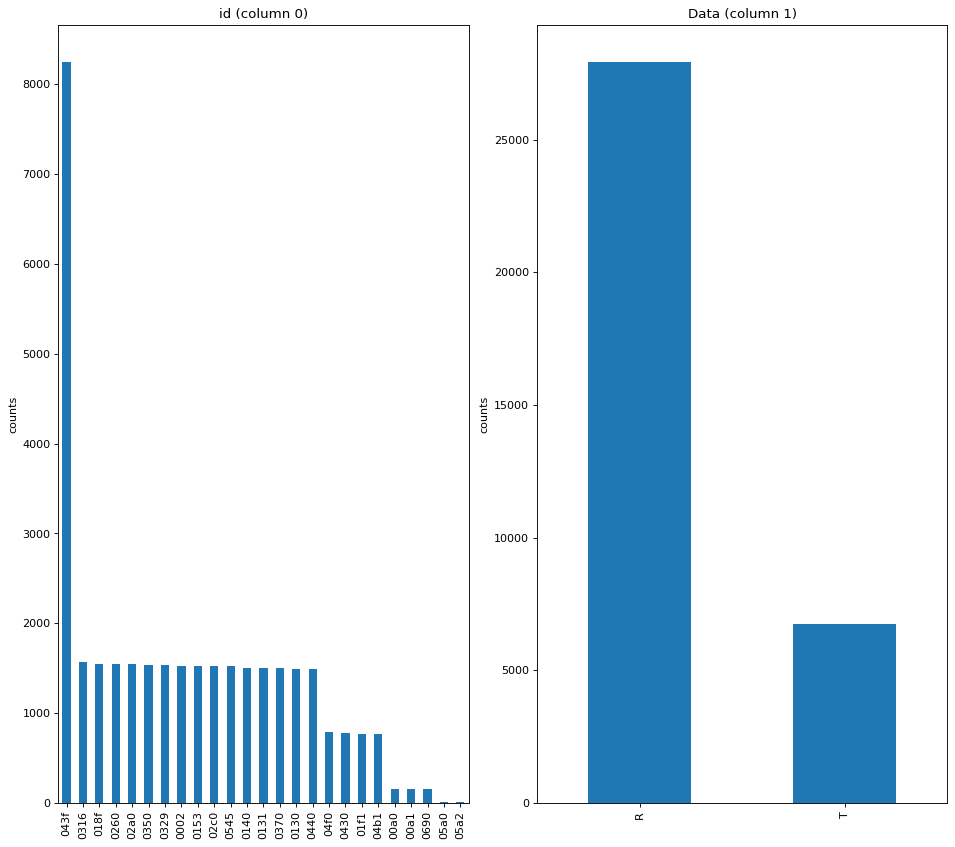

In [53]:
gear_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gear_dataset.csv",nrows=35000,sep=',',header=None)
gear_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
gear_data.columns = col_names
gear_data = gear_data.dropna()
gear_data = gear_data.drop(['dlc','d0','d1','d2','d3','d4','d5','d6','d7'], axis=1)
gear_data.head()
plotPerColumnDistribution(gear_data, 3, 3)

In [21]:
norm_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/normal_run_data.csv",nrows=35000,header=None)
col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
norm_data = norm_data.dropna()
norm_data.columns = col_names
norm_data.head()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,Data
0,1479121435,350,8,5,28,84,66,6d,0,0.1,a2,R
1,1479121435,02c0,8,14,0,0,0,0,0,0,0,R
2,1479121435,430,8,0,0,0,0,0,0,0,0,R
3,1479121435,04b1,8,0,0,0,0,0,0,0,0,R
4,1479121435,01f1,8,0,0,0,0,0,0,0,0,R


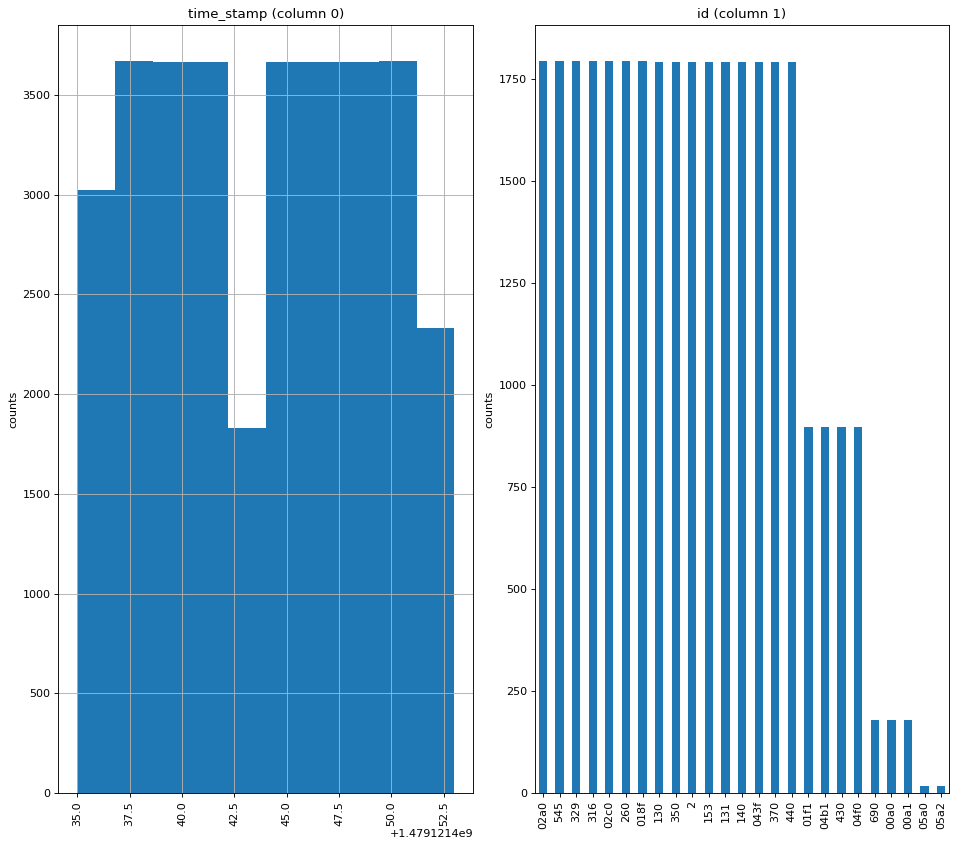

In [55]:
norm_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/normal_run_data.csv",nrows=35000,header=None)
norm_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','Data']
norm_data.columns = col_names
norm_data = norm_data.dropna()
norm_data = norm_data.drop(['dlc','d0','d1','d2','d3','d4','d5','d6','d7'], axis=1)
norm_data.head()
plotPerColumnDistribution(norm_data, 3, 3)